**matplotlib sorces:**   https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html?highlight=matshow#matplotlib.pyplot.matshow

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [101]:
digits = load_digits()

In [102]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [103]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# matplotlib.pyplot.gray():
Set the colormap to "gray".
This changes the default colormap as well as the colormap of the current image if there is one. See help(colormaps) for more information.

# matplotlib.pyplot.matshow(A, fignum=None, **kwargs)

Display an array as a matrix in a new figure window.

The origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally. The aspect ratio of the figure window is that of the array, unless this would make an excessively short or narrow figure.
Tick labels for the xaxis are placed on top.

<Figure size 432x288 with 0 Axes>

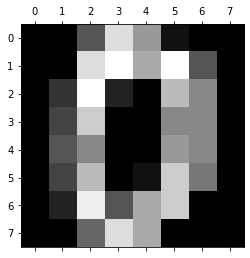

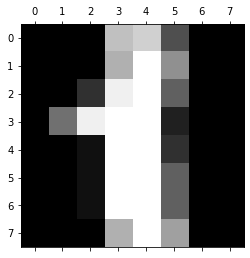

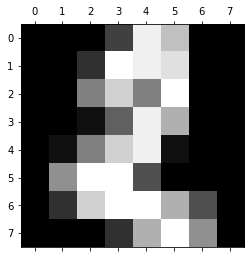

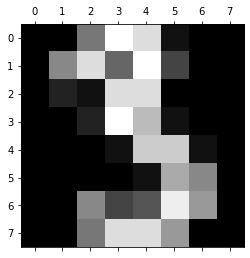

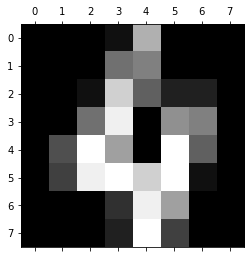

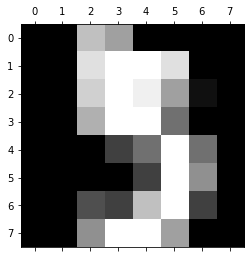

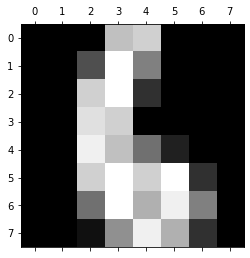

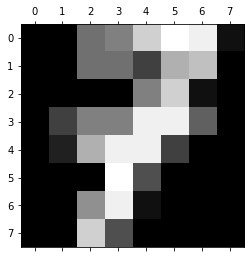

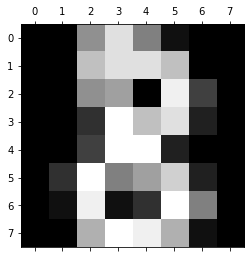

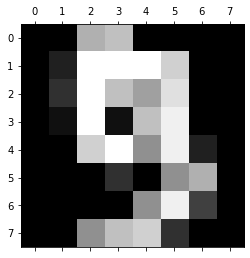

In [104]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [105]:
 digits.target[0:5]

array([0, 1, 2, 3, 4])

In [106]:
x = digits.data
y = digits.target

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [108]:
x_train

array([[ 0.,  1., 13., ..., 12.,  5.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  1.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ..., 16.,  9.,  0.]])

In [109]:
len(x_train)

1437

In [110]:
len(x_test)

360

In [111]:
model = LogisticRegression(solver='lbfgs',  multi_class='auto', max_iter=10000)

In [112]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
model.score(x_test, y_test)

0.975

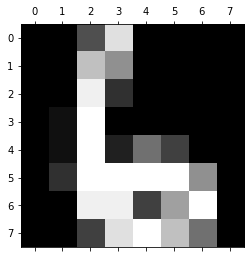

In [114]:
plt.matshow(digits.images[67])

In [115]:
digits.target[67]

6

In [116]:
model.predict([digits.data[67]])

array([6])

In [117]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [124]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]], dtype=int64)

**Confussion Matrix vidualization:**

Text(69.0, 0.5, 'Truth')

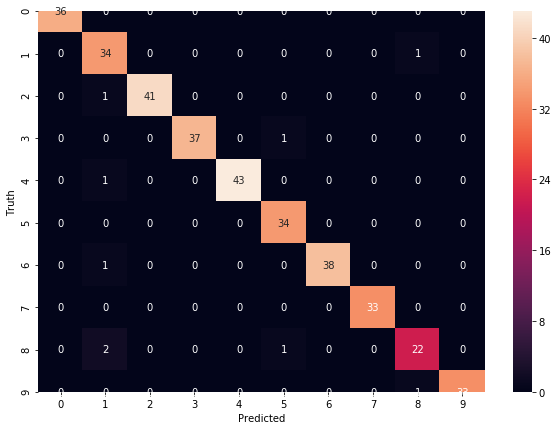

In [125]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')